# 넷플릭스 데이터 시각화

## 라이브러리 임포트

In [2]:
!pip install plotly

     |████████████████████████████████| 27.7 MB 7.5 MB/s            


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [9]:
#path = '/content/drive/MyDrive/아이펠/해커톤 1/넷플릭스/'
path = os.getenv('HOME')+ '/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)

netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [10]:
# Checking Shape of Dataset
netflix.shape

(8807, 12)

In [11]:
# How many columns are present in the Dataset?
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Informations about the Dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- `director`, `cast`, `country`, `date_add`, `rating`, `duration` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [13]:
# 데이터 셋 describe
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2014년`으로 나왔는데, 대략적으로 그 즈음부터 공개 작품 건수가 많아진 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [14]:
# 각 시리즈별 결측치 수 확인
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

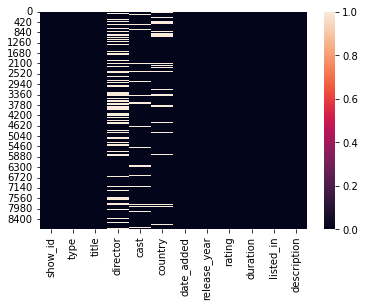

In [15]:
# 결측치 히트맵 그리기
sns.heatmap(netflix.isnull())

## 중복값 확인

In [16]:
# 중복값이 있는지 확인한다.
netflix.duplicated().sum()

0

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [17]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = netflix['listed_in'].dropna()
listed_in

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [18]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

42

In [100]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(netflix.index[netflix['listed_in'].notnull()][netflix['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [101]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- **Movies**와 **Dramas** 장르가 가장 많은 비중을 차지 했다.
- **International Movies**와 **TV shows**, **International TV shows**가 각각 **3, 5, 6위**를 차지했고, 흥미로운 점은 **Comedies**가 **4위**를 기록했다는 것이다.
- 물론 드라마, 영화의 세부 장르 중 하나일 것으로 예상되지만, **2,000편**이 넘는 작품 수와 순위가 의외라고 느껴졌다.

- **`감독`별 작품 수**

In [21]:
director = netflix['director'].dropna().value_counts()
director

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [22]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [23]:
# 엠마 스톤이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Emma Stone")])

8

- 위의 내용을 함수로 만들어준다.

In [25]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = netflix['cast'].dropna()
cast

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7982, dtype: object

In [26]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

36439

- 배우는 총 **36439명** 이다.

In [27]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

- 많은 작품에 나온 배우들은 오히려 유명하지 않은 배우가 많은 것 같아서, 가장 적은 작품에 출연한 배우들을 추려보았다.

In [72]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

,0
number,
1,25213
2,5452
3,2325
4,1136
5,699
...,...
29,1
51,1
31,1


In [96]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `69.2%`나 되는 배우들이 한 작품에만 출연한 것을 알 수 있었다.
- 그래서 배우별 작품 수를 구하고 싶었으나, **2만 5천명**이 넘는 배우들이 한 작품에만 출연했기 때문에 **다작 배우 TOP 50**이런 주제로 그래프로 작성하는 것이 불가능 했다.

# 디즈니 플러스 영화 분석

## 데이터 불러오기

**Data Description**

- `show_id` - Unique ID for every Movie/TV Show.
- `type` - Type of Content: Movie/TV Show.
- `title` - Name of the Movie/TV Show.
- `director` - Name of the Director of the Movie/TV Show.
- `cast` - Actors involved in the Movie/TV Show.
- `country` - Name of the Countries where the Movie/TV Show is produced.
- `date_added` - The Date in which the Movie/TV Show was added on Netflix.
- `release_year` - Original Release Year of the Movie/TV Show.
- `rating` - Rating of the Movie/TV Show.
- `duration` - Total Duration of the Movie (in Minutes) or TV Show (in Seasons).
- `listed_in` - Genre of the Movie/TV Show.
- `description` - Summary of the Movie/TV Show.

In [104]:
path_6 = path + 'disney_plus_titles.csv'
desney = pd.read_csv(path_6, encoding='latin1')
desney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [105]:
# Checking Shape of Dataset
desney.shape

(1450, 12)

In [106]:
# How many columns are present in the Dataset?
desney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [107]:
# Informations about the Dataset
desney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


- `director`, `cast`, `country`, `date_add`, `rating` 컬럼에서 결측치가 있음
- 특히 `director`, `cast`, `country`에서 결측치가 많아 보임

In [108]:
# 데이터 셋 describe
desney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


- 유일한 숫자 데이터(**int64**)인 `release_year` 시리즈에 대해서만 `describe()`가 진행되었다.
- 평균이 `2003년`으로 나왔는데, 대략적으로 그 즈음 개봉한 디즈니 영화가 많은 것으로 해석된다. 👉 **뒤의 시각화에서 확인해 봅시다!**

## 결측치가 있는지 확인

In [109]:
# 각 시리즈별 결측치 수 확인
desney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<AxesSubplot:>

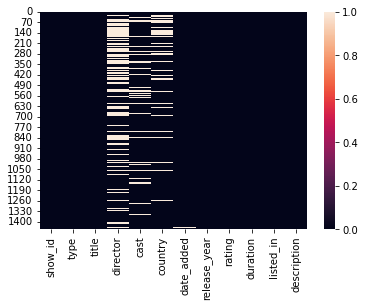

In [110]:
# 결측치 히트맵 그리기
sns.heatmap(desney.isnull())

## 중복값 확인

In [111]:
# 중복값이 있는지 확인한다.
desney.duplicated().sum()

0

- 중복값 없음

## 각 시리즈 별 데이터 수 확인

`장르`, `감독`, `배우`별 작품 수를 구하려니 조금 난감했던 것이, 여러 장르, 여러명의 감독, 배우가 겹쳐져 있어서 각 개별 요소로 떼어내는 작업이 필요했다.❗❗

그냥 `value_counts()`를 사용하는 것으로는 추출되지 않았음

- **`장르`별 작품 수**

In [112]:
# 결측치가 제거된 listed_in 시리즈를 listed_in 변수에 저장한다.
listed_in = desney['listed_in'].dropna()
listed_in

0                                   Animation, Family
1                                              Comedy
2                           Animation, Comedy, Family
3                                             Musical
4                       Docuseries, Historical, Music
                            ...                      
1445        Action-Adventure, Family, Science Fiction
1446                 Action-Adventure, Comedy, Family
1447                      Biographical, Comedy, Drama
1448                     Buddy, Comedy, Coming of Age
1449    Action-Adventure, Animals & Nature, Animation
Name: listed_in, Length: 1450, dtype: object

In [113]:
genre = []

for idx, v in enumerate(listed_in):
    c = v.split(', ')
    genre.extend(c)

# 장르 별 고유 리스트를 만들어 준다.
genre = np.unique(genre)

# 총 장르 수 확인
len(genre)

44

- 총 장르 수는 **44개**이다.

In [114]:
# 각 장르 별 작품 수를 딕셔너리로 만들어 준다.
genre_dict = {g : len(desney.index[desney['listed_in'].notnull()][desney['listed_in'].dropna().str.contains(pat = g)]) for g in genre}

# genre_dict 데이터 프레임으로 만들어 준다.
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns = ['number'])

# 작품 수가 Top 20인 장르들을 추려 본다.
genre_top_20 = genre_df.nlargest(20, 'number')

In [115]:
px.histogram(genre_top_20, x = genre_top_20.index, y = genre_top_20['number'], color = genre_top_20.index)

- 디즈니 영화 답게 **Family, Animation, Comedy, Action-Adventure**가 상위 4위로 랭크 되었다.
- **Animals & Nature, Coming of Age, Fantasy, Documentary**가 비슷한 비율로 다음 랭크를 차지하였다.

- **`감독`별 작품 수**

In [116]:
director = desney['director'].dropna().value_counts()
director

Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
                    ..
Simon Wells          1
David Lynch          1
Don Bluth            1
Milt Schaffer        1
Mark Waring          1
Name: director, Length: 609, dtype: int64

In [125]:
px.histogram(director, x = director.index[:30], y = director[:30], color = director[:30].index)

- **`배우`별 작품 수**

In [123]:
# 겨울왕국 엘사 역의 Idina Menzel이 출연한 작품 수 구하기
len(netflix.index[netflix['cast'].notnull()][netflix['cast'].dropna().str.contains("Idina Menzel")])

3

- 위의 내용을 함수로 만들어준다.

In [119]:
# 결측치가 제거된 cast 시리즈를 cast 변수에 저장한다.
cast = desney['cast'].dropna()
cast

0       Chris Diamantopoulos, Tony Anselmo, Tress MacN...
1                Jim Varney, Noelle Parker, Douglas Seale
2       Raymond Albert Romano, John Leguizamo, Denis L...
3       Darren Criss, Adam Lambert, Derek Hough, Alexa...
4       John Lennon, Paul McCartney, George Harrison, ...
                              ...                        
1445    Hugh Jackman, Liev Schreiber, Danny Huston, wi...
1446    Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...
1447    Tom Costello, Jo Hartley, Keith Allen, Dickon ...
1448    Parminder Nagra, Keira Knightley, Jonathan Rhy...
1449                                        Charlie Tahan
Name: cast, Length: 1260, dtype: object

In [120]:
actor = []

# cast 시리즈에서 여러명의 배우가 겹쳐져 있는 데이터를 한명 씩 분리하여 actor 리스트에 넣어준다.
for idx, v in enumerate(cast):
    c = v.split(', ')
    actor.extend(c)

# 배우 별 고유 리스트를 만들어 준다.
actor = np.unique(actor)

# 총 배우 수 확인
len(actor)

3759

- 배우는 총 **3,759명** 이다.
- 아마도 더빙 성우로 추정된다. (혹은 디즈니 영화의 특성 상 뮤지컬 배우가 있을 수 있다.)

In [124]:
# 각 배우 별 출연 작품 수를 딕셔너리로 만들어 준다.
actor_dict = {a : len(desney.index[desney['cast'].notnull()][desney['cast'].dropna().str.contains(pat = a)]) for a in actor}

# actor_dict를 데이터 프레임으로 만들어 준다.
actor_df = pd.DataFrame.from_dict(actor_dict, orient='index', columns = ['number'])

In [126]:
# 배우들의 작품 수 별 출연 횟수
actor_count = pd.DataFrame(actor_df.value_counts())
actor_count

,0
number,
1,2742
2,558
3,233
4,102
5,44
6,21
8,12
7,11
9,8


In [127]:
# 파이 그래프 그리기
fig = px.pie(actor_count, labels=actor_count.index, names=actor_count[0], values=actor_count[0], title='FILMS')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

- `약 72.9%`의 배우들이 디즈니 영화에 한 번씩만 출연했다.
- 넷플릭스에서와 마찬가지로, 너무 많은 배우들이 있어서 배우 별 출연 작품 수를 구하지 못하고 출연한 작품 수를 기준으로 배우들의 수를 구해 보았다.